In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time

import numpy as np
import h5py

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

In [3]:
with h5py.File('../data/waveforms/waveforms_3s_0100_1200.h5', 'r') as file:
    waveforms = np.array(file['waveforms'])
    failed = np.array(file['failed'])

waveforms = np.array([waveforms[i] for i in range(len(waveforms)) if i not in failed])
print(len(waveforms))

4079


In [4]:
waveform_maxima = [np.max(np.abs(waveform)) for waveform in waveforms]

9.65305313572e-22
1.41418227977e-22


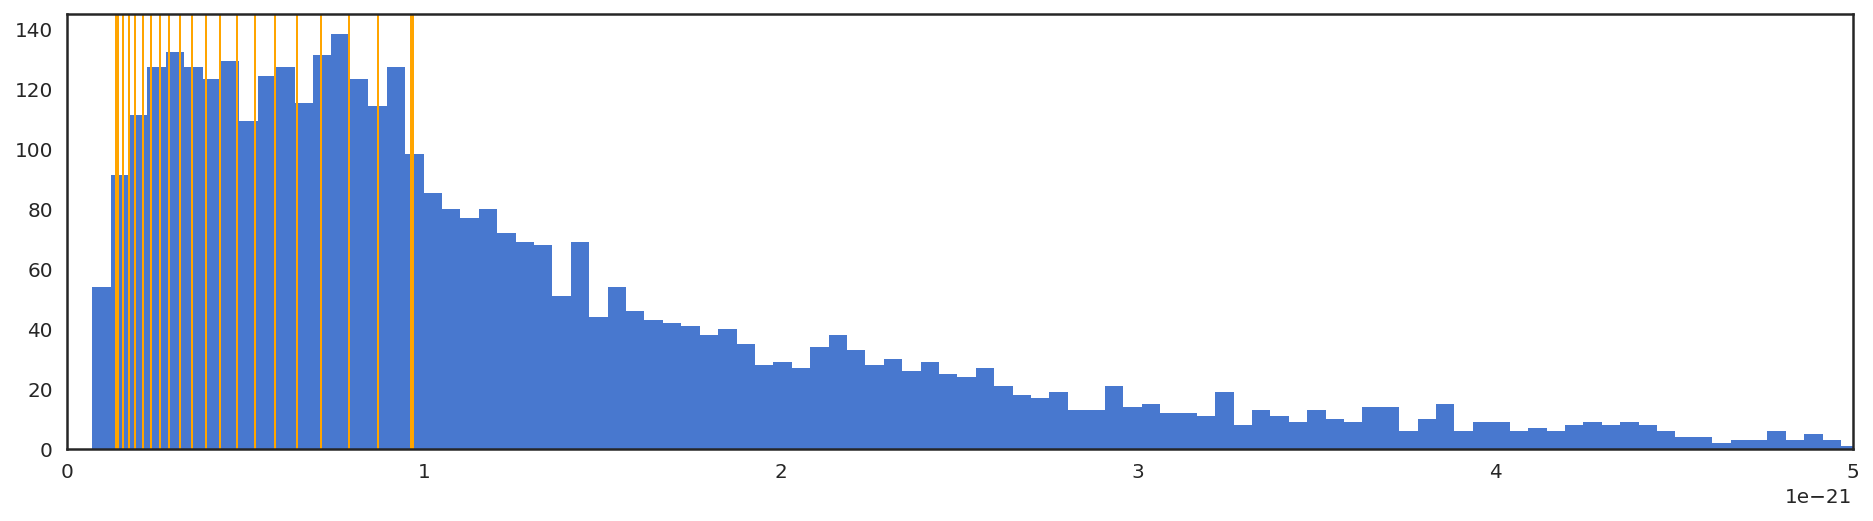

In [20]:
percentile_50 = np.percentile(waveform_maxima, 50)
percentile_02 = np.percentile(waveform_maxima, 2)

print(percentile_50)
print(percentile_02)

plt.gcf().set_size_inches(16, 4, forward=True)
# sns.distplot(waveform_maxima, hist=True, bins=100, kde_kws={"shade": False})
plt.hist(waveform_maxima, bins=200)
plt.xlim(0, 0.5*10**-20)

for x in np.geomspace(percentile_02, percentile_50, num=20):
    plt.axvline(x=x, color='Orange', lw=1)
plt.axvline(x=percentile_50, color='Orange', lw=2)
plt.axvline(x=percentile_02, color='Orange', lw=2)
    
plt.show()

In [16]:
thresholds = iter(np.geomspace(percentile_02, percentile_50, num=20)[::-1])

threshold = None
for epoch in range(100):
    if epoch % 5 == 0:
        threshold = next(thresholds)
    print(epoch, threshold)

0 9.65305313572e-22
1 9.65305313572e-22
2 9.65305313572e-22
3 9.65305313572e-22
4 9.65305313572e-22
5 8.72492244887e-22
6 8.72492244887e-22
7 8.72492244887e-22
8 8.72492244887e-22
9 8.72492244887e-22
10 7.88603053029e-22
11 7.88603053029e-22
12 7.88603053029e-22
13 7.88603053029e-22
14 7.88603053029e-22
15 7.12779716829e-22
16 7.12779716829e-22
17 7.12779716829e-22
18 7.12779716829e-22
19 7.12779716829e-22
20 6.44246712934e-22
21 6.44246712934e-22
22 6.44246712934e-22
23 6.44246712934e-22
24 6.44246712934e-22
25 5.82303083725e-22
26 5.82303083725e-22
27 5.82303083725e-22
28 5.82303083725e-22
29 5.82303083725e-22
30 5.26315267906e-22
31 5.26315267906e-22
32 5.26315267906e-22
33 5.26315267906e-22
34 5.26315267906e-22
35 4.75710620419e-22
36 4.75710620419e-22
37 4.75710620419e-22
38 4.75710620419e-22
39 4.75710620419e-22
40 4.29971555414e-22
41 4.29971555414e-22
42 4.29971555414e-22
43 4.29971555414e-22
44 4.29971555414e-22
45 3.88630252363e-22
46 3.88630252363e-22
47 3.88630252363e-22
48